<a href="https://colab.research.google.com/github/Nelman25/CCMACLRL_EXERCISES_COM231/blob/master/Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset

In [ ]:
df = pd.read_excel('./facebook_friends.xlsx')

Display the first 5 rows of the dataset using `.head()`

In [ ]:
df.head()

,Name,Post/share frequently,Active,Replies to comments/msgs,Number of friends/followers,Personality
0,Darren,0,1,0,871,1
1,Dan,1,1,0,227,0
2,Matthew,1,1,1,855,1
3,Luis,0,1,0,78,0
4,Octa,0,1,0,996,0


Display the summary of all the features of the dataset using `.info()`

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Name                         97 non-null     object
 1   Post/share frequently        97 non-null     int64 
 2   Active                       97 non-null     int64 
 3   Replies to comments/msgs     97 non-null     int64 
 4   Number of friends/followers  97 non-null     int64 
 5   Personality                  97 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 4.7+ KB


In [ ]:
df.describe()

,Post/share frequently,Active,Replies to comments/msgs,Number of friends/followers,Personality
count,97.000000,97.000000,97.000000,97.000000,97.000000
mean,0.546392,0.793814,0.422680,971.030928,0.494845
std,0.500429,0.406667,0.496552,1532.562794,0.502571
min,0.000000,0.000000,0.000000,19.000000,0.000000
25%,0.000000,1.000000,0.000000,205.000000,0.000000
50%,1.000000,1.000000,0.000000,596.000000,0.000000
75%,1.000000,1.000000,1.000000,996.000000,1.000000
max,1.000000,1.000000,1.000000,13000.000000,1.000000


Display the total number of samples from each label using `.value_counts()`

In [ ]:
# put your answer here
df["Personality"].value_counts()

,count
Personality,
0,49
1,48


Use a histogram to display the number of followers for each samples
 - The x axis should be the number of followers/friends
 - The y axis should be the number of samples in the dataset

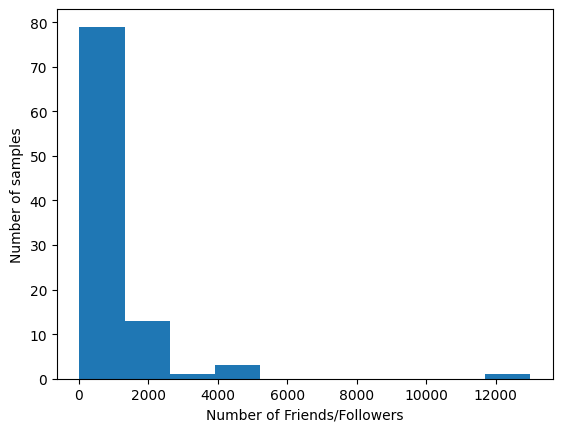

In [ ]:
plt.hist(df["Number of friends/followers"])
plt.xlabel("Number of Friends/Followers")
plt.ylabel("Number of samples")
plt.show()


Remove the name column using `drop()` method

In [ ]:
df.drop(columns="Name", inplace=True)
df.head()


,Post/share frequently,Active,Replies to comments/msgs,Number of friends/followers,Personality
0,0,1,0,871,1
1,1,1,0,227,0
2,1,1,1,855,1
3,0,1,0,78,0
4,0,1,0,996,0


## C. Split the dataset into training and test set

Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [ ]:
X = df.drop(columns=['Personality']).values
X

array([[    0,     1,     0,   871],
       [    1,     1,     0,   227],
       [    1,     1,     1,   855],
       [    0,     1,     0,    78],
       [    0,     1,     0,   996],
       [    0,     1,     0,   568],
       [    1,     1,     0,  3200],
       [    0,     1,     0,   123],
       [    1,     1,     1,   163],
       [    1,     1,     1,   131],
       [    0,     1,     0,   153],
       [    0,     1,     0,    63],
       [    0,     0,     0,   518],
       [    0,     1,     0,   523],
       [    1,     1,     0,   814],
       [    1,     1,     0,   958],
       [    0,     1,     0,   239],
       [    0,     0,     0,   197],
       [    0,     0,     1,   501],
       [    1,     1,     0,   174],
       [    1,     1,     1,   472],
       [    1,     1,     1,   916],
       [    1,     1,     1,   205],
       [    0,     0,     0,   596],
       [    0,     1,     0,   735],
       [    1,     1,     1,    88],
       [    1,     1,     1, 13000],
 

Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [ ]:
y = df["Personality"].values
y

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1])

Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=8)

Display the dimensions of each variables using `.shape()`

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(74, 4)
(74,)
(23, 4)
(23,)


## D. Create the model

Use KNN as a classifier by using `KNeighborsClassifier()`

In [ ]:
knn = KNeighborsClassifier(n_neighbors=11)

Train the model using the `.fit()`

In [ ]:
# put your answer here
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

Test the model using the `.predict()`

In [ ]:
# put your answer here
y_pred = knn.predict(X_test)

## E. Evaluate the model

Create a confusion matrix

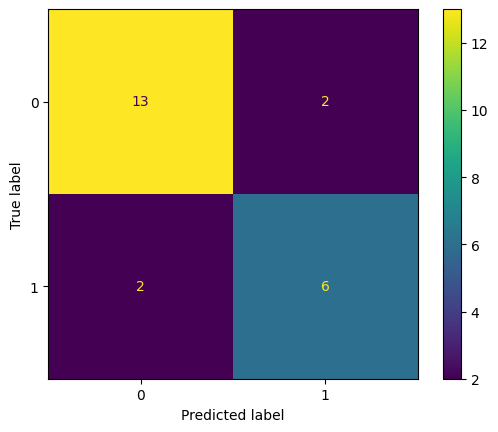

In [ ]:
# put your answer here
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()


Display the accuracy

In [ ]:
accuracy_score(y_test, y_pred)

0.8260869565217391

Display the precision

In [ ]:
precision = precision_score(y_test, y_pred, average=None)
precision

array([0.86666667, 0.75      ])

Display the recall

In [ ]:
recall = recall_score(y_test, y_pred, average=None)
recall

array([0.86666667, 0.75      ])

Display the f1-score

In [ ]:
f1 = f1_score(y_test, y_pred, average=None)
f1

array([0.86666667, 0.75      ])

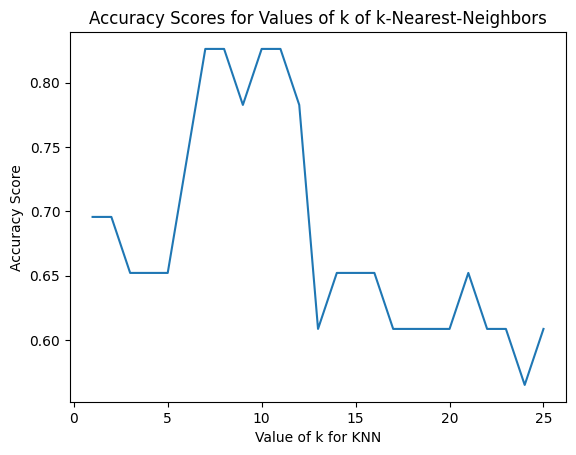

In [ ]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []

for k in k_range:

    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Test the model
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()


## F. Predict your own personality

Enter your own features and use the model to generate a prediction using `.predict()`

In [ ]:
# put your answer here
knn.predict([[0,1,0,110]])

array([0])